In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
pos = [x for x in range(1, 11)]
post = ["Pasante de Desarrollo",
 "Desarrollador Junior",
 "Desarrollador Intermedio",
 "Desarrollador Senior",
 "Líder de Proyecto",
 "Gerente de Proyecto",
 "Arquitecto de Software",
 "Director de Desarrollo",
 "Director de Tecnología",
 "Director Ejecutivo (CEO)"]
salary = [1200.0, 2500.0, 4000.0, 4800.0, 6500.0, 9000.0, 12820.0, 15000.0, 25000.0, 50000.0]

In [29]:
data = {
  "years": pos,
  "positions": post,
  "salary": salary
}

data = pd.DataFrame(data)
data.head()

,years,positions,salary
0,1,Pasante de Desarrollo,1200.0
1,2,Desarrollador Junior,2500.0
2,3,Desarrollador Intermedio,4000.0
3,4,Desarrollador Senior,4800.0
4,5,Líder de Proyecto,6500.0


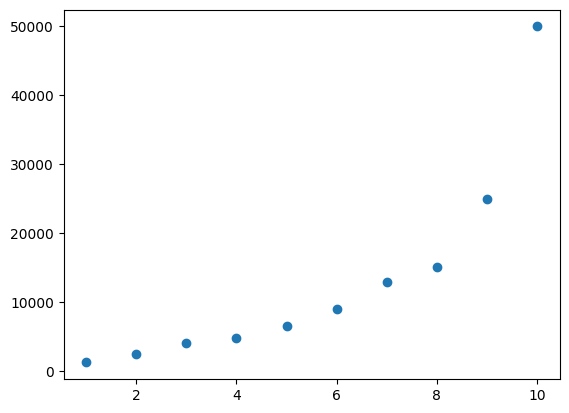

In [30]:
plt.scatter(x=data["years"], y=data["salary"])
plt.show()

In [31]:
x = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, -1].values

In [32]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(x, y)

LinearRegression()

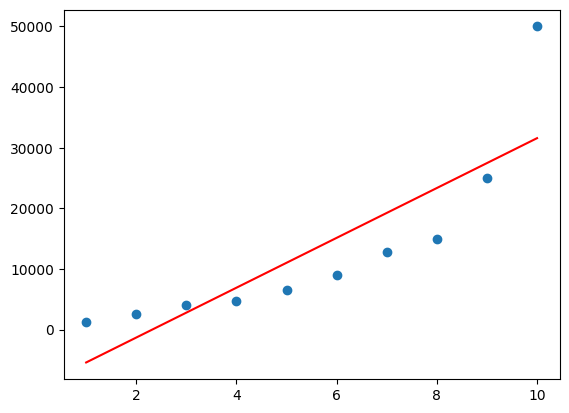

In [33]:
predition =  regression.predict(x)

plt.scatter(data["years"], data["salary"])
plt.plot(x, predition, color="red")
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [35]:
regression_2  = LinearRegression()
regression_2.fit(x_poly, y)

LinearRegression()

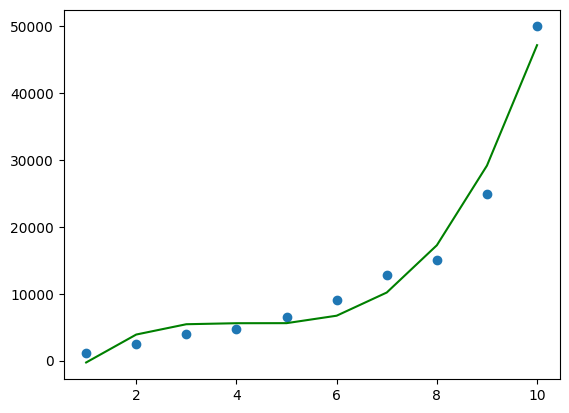

In [36]:
plt.scatter(data["years"], data["salary"])
plt.plot(x, regression_2.predict(x_poly), color="green")
plt.show()

In [40]:
predict = poly.fit_transform([[2]])
regression_2.predict(predict)

array([3901.88344988])

In [44]:
from sklearn.metrics import r2_score
y_predict = regression_2.predict(x_poly)
r2 = r2_score(y, y_predict)
r2

0.9745464790183823